# **Import Libraries and modules**

###First attempt , Plain Network</br>
###Summary:</br>
Contains 6 Convolution layers</br>
2 1x1 layers</br>
1-Max pooling layer</br>
epochs 20</br>
Accuracy Acheived : 98.82</br>
Total Parameters: 195,352

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


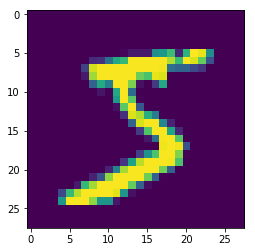

In [48]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [51]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [53]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
from keras.layers import Activation, MaxPooling2D,BatchNormalization
from keras.optimizers import Adam
model = Sequential() 

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1),name='layer1'))#......26......rf3....
model.add(Convolution2D(64, 3, 3, activation='relu',name='layer2'))#......24......rf5....
model.add(Convolution2D(128, 3, 3, activation='relu',name='layer3'))#......22......rf7....

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1 ,1, activation='relu',name='layer5'))#......11......rf14....
model.add(Convolution2D(64, 3, 3, activation='relu',name='layer6'))#......9......rf16....
model.add(Convolution2D(128, 3, 3, activation='relu',name='layer7'))#......7......rf18....

model.add(Convolution2D(10, 1, 1, activation='relu',name='final'))
model.add(Convolution2D(10, 7, 7,name='layer8'))#......7......rf18....

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="layer1")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="layer2")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="layer3")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu", name="layer5")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="layer6")`
  # 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
layer2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
layer3 (Conv2D)              (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
layer5 (Conv2D)              (None, 11, 11, 32)        4128      
_________________________________________________________________
layer6 (Conv2D)              (None, 9, 9, 64)          18496     
_________________________________________________________________
layer7 (Conv2D)              (None, 7, 7, 128)         73856     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="layer7")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="final")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (7, 7), name="layer8")`
  from ipykernel import kernelapp as app


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [64]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Epoch 1/20
  352/60000 [..............................] - ETA: 32s - loss: 0.0049 - acc: 0.9972

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 14s 237us/step - loss: 0.0045 - acc: 0.9988
Epoch 2/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0051 - acc: 0.9986
Epoch 3/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.0065 - acc: 0.9985
Epoch 4/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.0051 - acc: 0.9987
Epoch 5/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0063 - acc: 0.9984
Epoch 6/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.0048 - acc: 0.9986
Epoch 7/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.0074 - acc: 0.9985
Epoch 8/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0082 - acc: 0.9981
Epoch 9/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0098 - acc: 0.9980
Epoch 10/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0060 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [58]:
print(score)

[0.07097256931823194, 0.9882]


In [0]:
y_pred = model.predict(X_test)

In [60]:
print(y_pred[:9])
print(y_test[:9])

[[6.0485749e-17 1.9960813e-28 8.5360685e-26 7.2110006e-17 7.1460328e-36
  1.7473740e-28 0.0000000e+00 1.0000000e+00 1.8380728e-25 1.6518736e-17]
 [2.3438924e-25 4.1846662e-30 1.0000000e+00 1.5006564e-38 7.8321521e-33
  0.0000000e+00 3.5249027e-31 9.2978109e-36 1.5686462e-33 0.0000000e+00]
 [9.3185705e-16 1.0000000e+00 6.8631956e-17 1.5735821e-21 5.5005015e-12
  1.2660730e-15 1.9216236e-17 1.4970612e-10 3.3438992e-16 8.2815184e-20]
 [1.0000000e+00 3.8387505e-21 5.1131682e-18 2.4451899e-23 1.0129457e-16
  3.8033802e-18 1.1875934e-14 2.9164169e-20 1.9225979e-18 1.0585637e-12]
 [1.1152027e-21 6.1112044e-29 2.8619114e-32 5.8929407e-28 1.0000000e+00
  1.8684940e-24 1.2619483e-18 7.6995140e-29 3.0744772e-22 1.3948065e-12]
 [2.0149565e-19 1.0000000e+00 2.0497789e-14 1.5166907e-22 3.0987038e-10
  6.5487786e-18 8.9907468e-18 1.5216208e-09 4.9057491e-16 2.6375070e-21]
 [5.5748125e-36 7.9350124e-23 5.8085275e-22 1.6691489e-30 1.0000000e+00
  1.7780639e-19 9.6167904e-32 5.3955941e-12 1.2105490e-12 

128


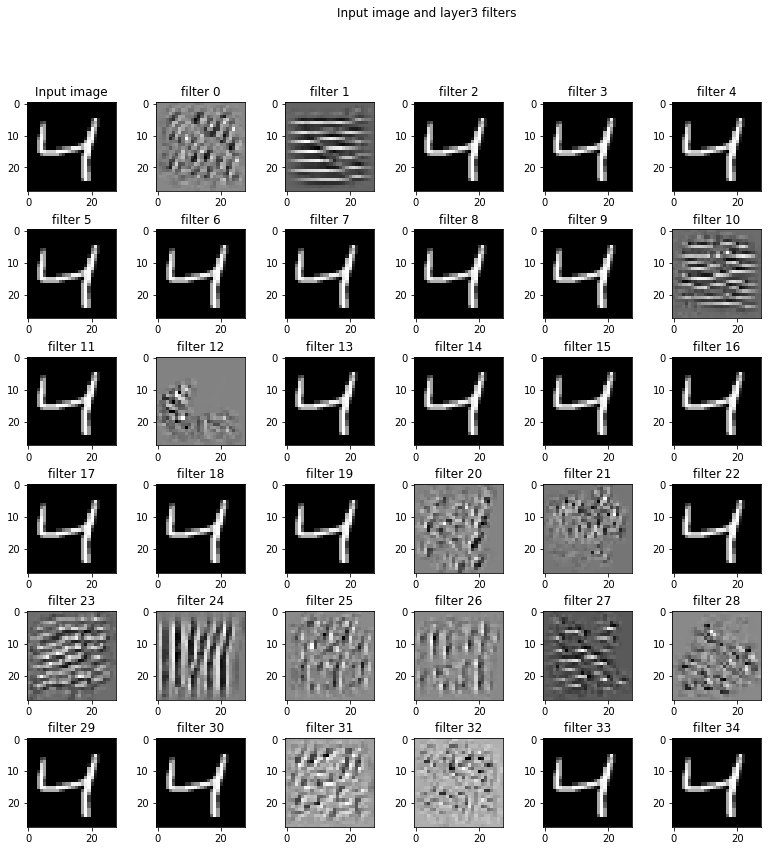

In [61]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(layer_name,img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64)):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print(layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x,plot_y, figsize = (12, 12))
    reshape = img.reshape((28, 28))
    ax[0, 0].imshow(reshape, cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name= 'layer3')

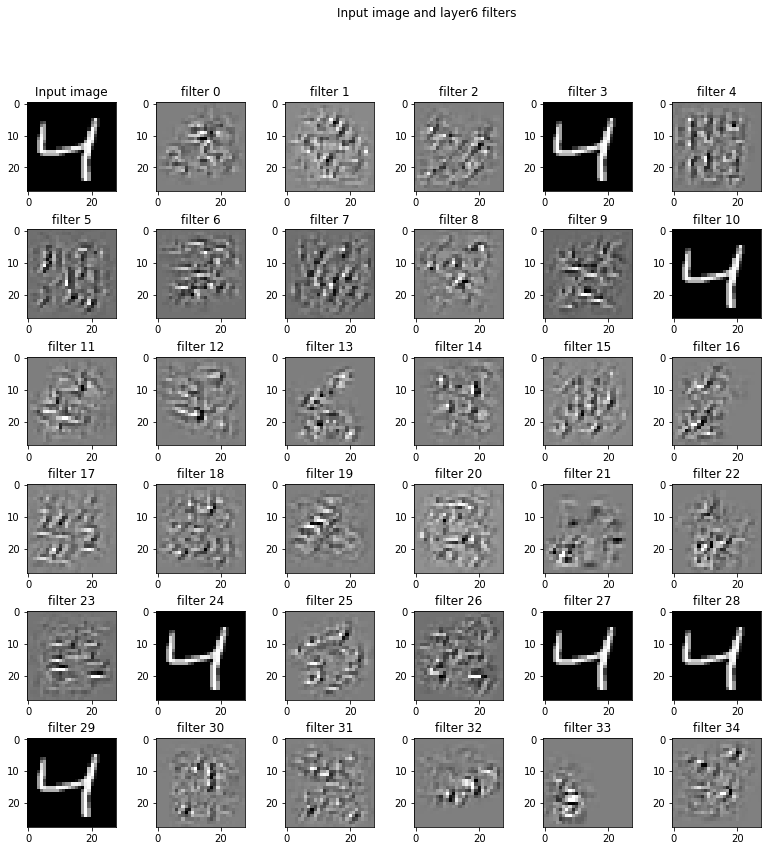

In [62]:
vis_img_in_filter(layer_name= 'layer6')